In [ ]:
# !python -m pip install paddlepaddle-gpu -i https://mirror.baidu.com/pypi/simple
!python3 -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

In [ ]:
!pip install paddleocr

In [3]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 44847, done.
remote: Counting objects: 100% (1130/1130), done.
remote: Compressing objects: 100% (510/510), done.
remote: Total 44847 (delta 736), reused 964 (delta 619), pack-reused 43717
Receiving objects: 100% (44847/44847), 338.30 MiB | 23.13 MiB/s, done.
Resolving deltas: 100% (31556/31556), done.
Checking out files: 100% (1617/1617), done.


## Imports

In [4]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
import cv2
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'false'

In [59]:
!wget https://raw.githubusercontent.com/nicknochnack/DrugLabelExtraction-/main/drug1.jpg
!wget https://raw.githubusercontent.com/nicknochnack/DrugLabelExtraction-/main/drug2.jpg
!wget https://raw.githubusercontent.com/nicknochnack/DrugLabelExtraction-/main/drug3.jpg

--2022-11-03 22:12:27--  https://raw.githubusercontent.com/nicknochnack/DrugLabelExtraction-/main/drug1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19705 (19K) [image/jpeg]
Saving to: ‘drug1.jpg’

drug1.jpg           100%[===================>]  19.24K  --.-KB/s    in 0.001s  

2022-11-03 22:12:27 (12.6 MB/s) - ‘drug1.jpg’ saved [19705/19705]

--2022-11-03 22:12:27--  https://raw.githubusercontent.com/nicknochnack/DrugLabelExtraction-/main/drug2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34907 (34K) [image/jpeg]
Sa

## Instantiate the Model and Perform Detection

In [6]:
ocr = PaddleOCR(lang = 'en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:03<00:00, 1.24MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:02<00:00, 3.61MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:01<00:00, 1.37MiB/s]

[2022/11/03 21:54:03] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

In [7]:
img_1_path = './drug1.jpg'
img_2_path = './drug2.jpg'
img_3_path = './drug3.jpg'

[2022/11/03 22:14:47] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/03 22:14:48] ppocr DEBUG: dt_boxes num : 6, elapse : 0.1864461898803711
[2022/11/03 22:14:48] ppocr DEBUG: rec_res num  : 6, elapse : 0.5279734134674072
[[[[[218.0, 181.0], [228.0, 177.0], [232.0, 186.0], [222.0, 190.0]], ('Rx', 0.5576735734939575)], [[[219.0, 199.0], [288.0, 202.0], [288.0, 216.0], [218.0, 214.0]], ('S0 MCG TABLETS', 0.8884428143501282)], [[[217.0, 218.0], [337.0, 215.0], [338.0, 232.0], [218.0, 235.0]], ('TAKE ONE TABLET BY', 0.9609463214874268)], [[[219.0, 232.0], [285.0, 234.0], [285.0, 249.0], [218.0, 246.0]], ('EVERY DAY', 0.9429683685302734)], [[[219.0, 257.0], [254.0, 260.0], [253.0, 274.0], [218.0, 272.0]], ('QTY:90', 0.9474544525146484)], [[[218.0, 289.0], [293.0, 293.0], [292.0, 306.0], [217.0, 303.0]], ('OF:12-012019', 0.8215628266334534)]]]


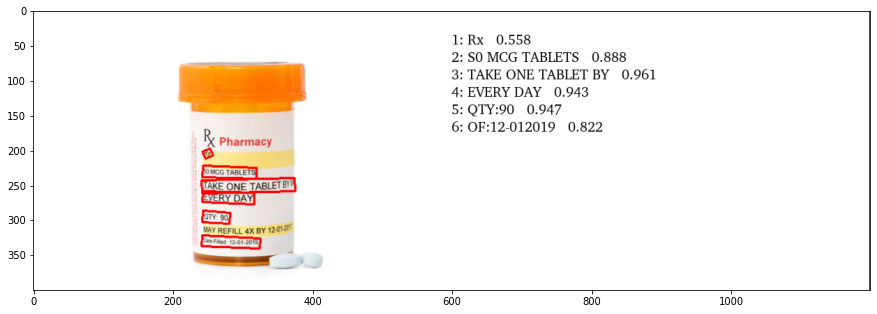

In [68]:
result = ocr.ocr(img_1_path)

print(result)

boxes = []
for i in range(len(result[0])):
  boxes.append(result[0][i][0])

texts = []
for i in range(len(result[0])):
  texts.append(result[0][i][1][0])

scores = []
for i in range(len(result[0])):
  scores.append(result[0][i][1][1])

font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

img = cv2.imread(img_1_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))

annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 
plt.imshow(annotated)

[2022/11/03 22:13:45] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/03 22:13:45] ppocr DEBUG: dt_boxes num : 25, elapse : 0.3071165084838867
[2022/11/03 22:13:47] ppocr DEBUG: rec_res num  : 25, elapse : 2.5090551376342773
[[[[[322.0, 105.0], [406.0, 112.0], [405.0, 131.0], [321.0, 123.0]], ('macy.0300', 0.8296473622322083)], [[[75.0, 107.0], [216.0, 107.0], [216.0, 129.0], [75.0, 129.0]], ('CVS/pharmacy.', 0.9448906779289246)], [[[583.0, 108.0], [695.0, 109.0], [695.0, 124.0], [583.0, 123.0]], ('ASPIRIN WITHOUT MD', 0.8318578004837036)], [[[583.0, 120.0], [719.0, 122.0], [719.0, 133.0], [583.0, 131.0]], ('APPROVAL.CONTINUELOEDOH', 0.8341558575630188)], [[[584.0, 129.0], [699.0, 131.0], [699.0, 143.0], [584.0, 141.0]], ("AUPRINUNLESS MD'STOPS", 0.8473861217498779)], [[[583.0, 147.0], [714.0, 148.0], [714.0, 159.0], [583.0, 158.0]], ('DONOT TAKE THIS DRUG IFYOU', 0.8089934587478638)], [[[583.0, 156

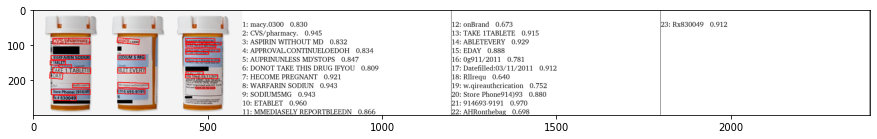

In [65]:
result = ocr.ocr(img_2_path)

print(result)

boxes = []
for i in range(len(result[0])):
  boxes.append(result[0][i][0])

texts = []
for i in range(len(result[0])):
  texts.append(result[0][i][1][0])

scores = []
for i in range(len(result[0])):
  scores.append(result[0][i][1][1])

font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

img = cv2.imread(img_2_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))

annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 
plt.imshow(annotated)

[2022/11/03 22:14:20] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/03 22:14:21] ppocr DEBUG: dt_boxes num : 30, elapse : 0.6318600177764893
[2022/11/03 22:14:23] ppocr DEBUG: rec_res num  : 30, elapse : 2.7210874557495117
[[[[[77.0, 35.0], [95.0, 35.0], [95.0, 53.0], [77.0, 53.0]], ('a', 0.800006091594696)], [[[662.0, 35.0], [680.0, 35.0], [680.0, 54.0], [662.0, 54.0]], ('a', 0.5154640674591064)], [[[802.0, 162.0], [830.0, 162.0], [830.0, 188.0], [802.0, 188.0]], ('a', 0.9991482496261597)], [[[20.0, 327.0], [120.0, 254.0], [141.0, 283.0], [41.0, 356.0]], ('alamy', 0.9972480535507202)], [[[539.0, 332.0], [752.0, 197.0], [775.0, 234.0], [563.0, 370.0]], ('Pharmacy', 0.9914777874946594)], [[[1097.0, 417.0], [1128.0, 417.0], [1128.0, 447.0], [1097.0, 447.0]], ('a', 0.9972516894340515)], [[[525.0, 485.0], [848.0, 254.0], [873.0, 290.0], [550.0, 521.0]], ('AMOXICILLIN 500 MGC', 0.9541283845901489)], [[

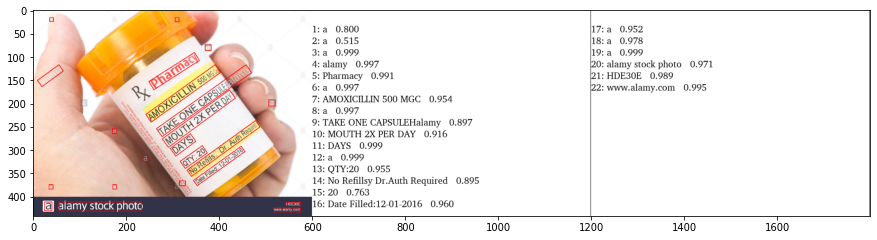

In [67]:
result = ocr.ocr(img_3_path)

print(result)

boxes = []
for i in range(len(result[0])):
  boxes.append(result[0][i][0])

texts = []
for i in range(len(result[0])):
  texts.append(result[0][i][1][0])

scores = []
for i in range(len(result[0])):
  scores.append(result[0][i][1][1])

font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

img = cv2.imread(img_3_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))

annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 
plt.imshow(annotated)